# Plot temperature response over time

This notebook plots temperature respons to SLCFs AND the total scenario forcing in a fixed nr of years

## Imports:

import matplotlib.pyplot as plt
import pandas as pd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import xarray as xr
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

%load_ext autoreload
%autoreload 2

In [3]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic
from ar6_ch6_rcmipfigs.utils.plot import get_var_nicename

<IPython.core.display.Javascript object>

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


In [4]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

# PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / '/dT_data_rcmip_models.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP_recommendation.nc'

#### Uncertainty data from Chris

In [5]:
PATH_DT_UNCERTAINTY = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris.nc'

## Set values:

In [6]:
first_y = '1750'
last_y = '2100'
# Years to plot:
years = ['2040', '2100']

**Set reference year for temperature change:**

In [7]:
ref_year = '2020'

In [8]:
FIGURE_DIR = RESULTS_DIR / 'figures_recommendation/'

TABS_DIR = RESULTS_DIR / 'tables_recommendation/'

In [9]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'

In [10]:
recommendation = 'recommendation'
name_deltaT = 'Delta T'
sum_v = 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'

scenario_tot = 'Scenario total'

### Define variables to look at:

In [11]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-total',
    'o3',
    'HFCs',
    'bc_on_snow']
# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:

In [12]:

scenarios_fl_370 = ['ssp370', 'ssp370-lowNTCF-aerchemmip', 'ssp370-lowNTCF-gidden'  # Due to mistake here
                    ]

### Scenarios:

In [13]:
scenarios_fl = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                'ssp370-lowNTCF-gidden',
                'ssp585']
scenarios_fl_oneNTCF = ['ssp119',
                        'ssp126',
                        'ssp245',
                        'ssp370',
                        'ssp370-lowNTCF-aerchemmip',
                        # 'ssp370-lowNTCF-gidden',
                        'ssp585']

In [14]:
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'

In [15]:
table_csv_name = TABS_DIR / '3-2_table_all_scen.csv'
print(table_csv_name)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables_recommendation/3-2_table_all_scen.csv


In [16]:

variables_tot = ['Total']
variables_sum = ['Sum SLCFs']


def setup_table_prop(scenario_n='', yrs=None, _vlist=None, scens=None):
    if _vlist is None:
        _vlist = variables_erf_comp
    if yrs is None:
        yrs = ['2040', '2100']
    if scens is None:
        scens = scenarios_fl
    its = [yrs, _vlist]
    _i = pd.MultiIndex.from_product(its, names=['', ''])
    table = pd.DataFrame(columns=scens, index=_i)  # .transpose()
    table.index.name = scenario_n
    return table

## Open dataset:

### Integrate:
The code below opens the file generated in [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) by integrating

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

where IRF is the impulse response function and ERF is the effective radiative forcing from RCMIP. 

In [17]:
ds_DT = xr.open_dataset(PATH_DT)
ds_uncertainty = xr.open_dataset(PATH_DT_UNCERTAINTY)

In [18]:
print(PATH_DT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP_recommendation.nc


## Add sum as variable:

In [19]:
_str = ''
_vl = [get_var_nicename(var).split('(')[0].strip() for var in variables_erf_comp]
for var in _vl:
    _str += f'{var}, '

# ax.set_title('Temperature change, sum SLCF  (%s)' % _str[:-2])


vn_sum = 'Sum SLCF (%s)' % _str[:-2]
print(vn_sum)

# _st = vn_sum.replace('(','').replace(')','').replace(' ','_').replace(',','')+'.csv'


_da_sum = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable)
# _da = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable).sel(year=slice(int(s_y2), int(e_y2))) - ds_DT_sy
_da_sum  # .assin_coord()
# _ds_check = ds_DT.copy()
ds_DT
# xr.concat([_ds_check[name_deltaT],_da_sum], dim=variable)

dd1 = _da_sum.expand_dims(
    {'variable':
         ['Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)']})
# dd1=dd1.to_dataset()

ds_DT = xr.merge([ds_DT, dd1])

Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)


## Compute sum of all SLCF forcers

In [20]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_c_dic, get_scenario_ls_dic

In [21]:


cdic = get_scenario_c_dic()
lsdic = get_scenario_ls_dic()


def sum_name(_var):
    """
    Returns the name off the sum o
    """
    return f'{_var} sum '




### compute sum: 

sum_name = 'Sum SLCFs'
ds_sub = ds_DT.sel(variable=variables_erf_comp)
ds_sum = ds_sub.sum(variable)
ds_sum = ds_sum.assign_coords(coords={variable: sum_name})
# add sum to variable coordinatem

ds_sum = xr.concat([ds_sum, ds_DT.sel(variable=variables_erf_comp)], dim=variable)

In [22]:
ds_sum = ds_DT  # .assign_coords(coords={variable:sum_name})



rn_dic = {}
for v in variables_all:
    rn_dic[v] = get_var_nicename(v)

rn_dic_scen = {#'Total': scenario_tot,
    'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip',
    'ssp370-lowNTCF-gidden': 'ssp370-lowNTCF\n-gidden',
}

In [23]:
def fix_names(df):
    df = df.rename(rn_dic)
    df = df.rename(rn_dic_scen, axis=1)
    return df

In [24]:
scntab_dic = {}


# tab_tot = setup_table2()
# tab_tot_sd = setup_table2()
def table_of_sts(_ds, _scn_fl, variables, tab_vars, _yrs, ref_yr, sts=recommendation):
    """
    Creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios,

    :param _ds:
    :param _scn_fl:
    :param variables:
    :param tab_vars:
    :param _yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=_yrs, _vlist=tab_vars)
    for scn in _scn_fl:
        for _var, tabvar in zip(variables, tab_vars):
            # dtvar =  name_deltaT # if ERF name, changes it here.
            tabscn = scn  # Table scenario name the same.
            for year in _yrs:
                _da = _ds[name_deltaT].sel(scenario=scn, variable=_var)
                _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
                _da_y = _da.sel(year=slice(year, year))  # year value
                _tab_da = _da_y - _da_refy
                tabel.loc[(year, tabvar), tabscn] = float(_tab_da.sel(percentile=sts).squeeze().values)  # [0]
    return fix_names(tabel)
    #return tabel





def table_of_stats_varsums(_ds, dsvar, tabvar, yrs, ref_yr, sts=recommendation):
    """
    Sums up over dimension 'variable' and creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios. 

    :param tabvar:
    :param dsvar:
    :param _ds:
    :param yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=yrs, _vlist=[tabvar])
    da = _ds[name_deltaT].sel(variable=dsvar)

    for scn in scenarios_fl:
        tabscn = scn  # Table scenario name the same.
        for year in yrs:
            _da = da.sel(scenario=scn, percentile=sts)  # , variable = dsvar)
            _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
            _da_y = _da.sel(year=slice(year, year)).squeeze()  # year value
            _tab_da = (_da_y - _da_refy).squeeze()

            # Do statistics over RCMIP models
            tabel.loc[(year, tabvar), tabscn] = float(_tab_da.squeeze().values)  # [0]

    return tabel

### Computes statistics:

In [25]:
ds_uncertainty = ds_uncertainty.to_array('percentile').rename(name_deltaT).to_dataset()
ds_uncertainty

<xarray.Dataset>
Dimensions:      (base_period: 1, percentile: 10, scenario: 10, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'total_anthropogenic'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
  * percentile   (percentile) <U7 'p05' 'p16' 'p50' ... 'p84-p50' 'p95-p50'
Data variables:
    Delta T      (percentile, scenario, variable, year, base_period) float64 0.0 ... 1.468

In [26]:
ds_DT.percentile

<xarray.DataArray 'percentile' (percentile: 1)>
array(['recommendation'], dtype=object)
Coordinates:
  * percentile  (percentile) object 'recommendation'

In [27]:
ds_DT.variable.values





array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-cloud_interactions', 'aerosol-radiation_interactions',
       'aerosol-total', 'aerosol-total-with_bc', 'bc_on_snow', 'ch4',
       'co2', 'contrails', 'h2o_stratospheric', 'land_use', 'n2o', 'o3',
       'other_wmghg', 'solar', 'total', 'total_anthropogenic',
       'total_natural', 'volcanic'], dtype=object)

In [28]:
from ar6_ch6_rcmipfigs.utils.plot import nice_name_var as nice_name_var_dic

## Make csv table:


In [29]:
import pandas as pd

In [30]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp + [sum_v, 'total_anthropogenic'],
                              variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                              ref_year)
_tab = tabel_dT_slcfs.transpose()

o3 = 'Ozone (O$_3$)'
ch4 = 'Methane (CH$_4$)'
HFCs = 'HFCs'
_sum = 'CH$_4$+O$_3$+HFCs'
for year in ['2040', '2100']:
    _tab[(year, _sum)] = _tab[(year, o3)] + _tab[(year, ch4)] + _tab[(year, HFCs)]
_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()

In [31]:
_tab

ssp119  \
                                                                      
2040 Aerosols                                                0.3018   
     BC on snow                                          -0.0280065   
     CH$_4$+O$_3$+HFCs                                    -0.110355   
     HFCs                                                0.00559328   
     Methane (CH$_4$)                                    -0.0328498   
     Ozone (O$_3$)                                       -0.0830983   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.163439   
     total_anthropogenic                                   0.397428   
2100 Aerosols                                              0.466045   
     BC on snow                                          -0.0415275   
     CH$_4$+O$_3$+HFCs                                    -0.315564   
     HFCs                                               -0.00401652   
     Methane (CH$_4$)                                     -0.163074   
     Ozone (O$_3$)                                        -0.148473   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.108953   
     total_anthropogenic                                   0.116036   

                                                             ssp126  \
                                                                      
2040 Aerosols                                              0.251685   
     BC on snow                                          -0.0233254   
     CH$_4$+O$_3$+HFCs                                   -0.0634259   
     HFCs                                                 0.0173057   
     Methane (CH$_4$)                                    -0.0208684   
     Ozone (O$_3$)                                       -0.0598631   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.164934   
     total_anthropogenic                                   0.505497   
2100 Aerosols                                              0.473464   
     BC on snow                                          -0.0394008   
     CH$_4$+O$_3$+HFCs                                    -0.304158   
     HFCs                                               -0.00167825   
     Methane (CH$_4$)                                      -0.15534   
     Ozone (O$_3$)                                         -0.14714   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.129905   
     total_anthropogenic                                   0.544207   

                                                             ssp245  \
                                                                      
2040 Aerosols                                             0.0490549   
     BC on snow                                         -0.00242724   
     CH$_4$+O$_3$+HFCs                                    0.0854873   
     HFCs                                                 0.0287474   
     Methane (CH$_4$)                                     0.0417628   
     Ozone (O$_3$)                                         0.014977   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.132115   
     total_anthropogenic                                   0.584779   
2100 Aerosols                                              0.317819   
     BC on snow                                           -0.035945   
     CH$_4$+O$_3$+HFCs                                    0.0106293   
     HFCs                                                  0.057604   
     Methane (CH$_4$)                                   -0.00104217   
     Ozone (O$_3$)                                       -0.0459325   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.292503   
     total_anthropogenic                                    1.75423   

                                                            ssp370  \
                                                                     
2040 Aerosols                                           -0.0726136   
     BC on sno

In [32]:
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_2040_2100_tab.csv'
_tab.to_csv(fn)

### Table +/-percentiles

In [33]:
sum_v

'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'

In [34]:
ds_uncertainty.variable

<xarray.DataArray 'variable' (variable: 7)>
array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-total', 'bc_on_snow', 'ch4', 'o3', 'total_anthropogenic'],
      dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'total_anthropogenic'

In [35]:
# Mean:
tabel_dT_slcfs_5th = tabel_dT_slcfs + table_of_sts(ds_uncertainty, scenarios_fl, variables_erf_comp + [sum_v, 'total_anthropogenic'],
                                                   variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                                                   ref_year, sts='p05-p50')
_tab = tabel_dT_slcfs_5th.transpose()

_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_5th_perc_2040_2100_tab.csv'
_tab.to_csv(fn)

In [36]:
# Mean:
tabel_dT_slcfs_95th = tabel_dT_slcfs + table_of_sts(ds_uncertainty, scenarios_fl,
                                                    variables_erf_comp + [sum_v, 'total_anthropogenic'],
                                                    variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                                                    ref_year, sts='p95-p50')
_tab = tabel_dT_slcfs_95th.transpose()

_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_95th_perc_2040_2100_tab.csv'
_tab.to_csv(fn)

In [37]:
_tab

ssp119  \
                                                                       
2040 Aerosols                                               0.517559   
     BC on snow                                          -0.00759522   
     HFCs                                                  0.0100009   
     Methane (CH$_4$)                                     -0.0225379   
     Ozone (O$_3$)                                         -0.050453   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...     0.354325   
     total_anthropogenic                                    0.691393   
2100 Aerosols                                               0.850008   
     BC on snow                                           -0.0110095   
     HFCs                                               -0.000990934   
     Methane (CH$_4$)                                      -0.117069   
     Ozone (O$_3$)                                        -0.0853666   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...     0.421356   
     total_anthropogenic                                    0.524542   

                                                             ssp126  \
                                                                      
2040 Aerosols                                              0.445745   
     BC on snow                                         -0.00611319   
     HFCs                                                 0.0241285   
     Methane (CH$_4$)                                    -0.0109507   
     Ozone (O$_3$)                                       -0.0369916   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.347267   
     total_anthropogenic                                   0.804955   
2100 Aerosols                                              0.847468   
     BC on snow                                          -0.0105187   
     HFCs                                                0.00240058   
     Methane (CH$_4$)                                     -0.110478   
     Ozone (O$_3$)                                       -0.0845055   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.429477   
     total_anthropogenic                                    1.06678   

                                                             ssp245  \
                                                                      
2040 Aerosols                                             0.0953062   
     BC on snow                                           0.0010191   
     HFCs                                                  0.037597   
     Methane (CH$_4$)                                     0.0595537   
     Ozone (O$_3$)                                         0.031096   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.199777   
     total_anthropogenic                                   0.798074   
2100 Aerosols                                              0.629819   
     BC on snow                                         -0.00922558   
     HFCs                                                  0.078891   
     Methane (CH$_4$)                                     0.0377249   
     Ozone (O$_3$)                                       -0.0168835   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.612429   
     total_anthropogenic                                     2.5972   

                                                             ssp370  \
                                                                      
2040 Aerosols                                            -0.0202611   
     BC on snow                                           0.0407693   
     HFCs                                                 0.0348201   
     Methane (CH$_4$)                                      0.102007   
     Ozone (O$_3$)                                         0.113204   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.186781   
     total_anthropogenic                                   0.850928

In [38]:
# Statistics on Delta T anthropogenic
# Mean
tabel_dT_anthrop = table_of_sts(ds_DT, scenarios_fl, ['total_anthropogenic'], [scenario_tot], years, ref_year)

# 5th
tabel_dT_anthrop_5th = -table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     ['total_anthropogenic'],
                                     [scenario_tot],
                                     years,
                                     ref_year,
                                     sts='p05-p50'
                                     )
# 95th

tabel_dT_anthrop_95th = table_of_sts(ds_uncertainty, scenarios_fl, ['total_anthropogenic'], [scenario_tot], years, ref_year,
                                     sts='p95-p50')
tabel_dT_anthrop_95th.loc['2040']
tabel_dT_anthrop_5th.loc['2040']

,ssp119,ssp126,ssp245,ssp370,ssp370-lowNTCF\n-aerchemmip,ssp370-lowNTCF\n-gidden,ssp585
,,,,,,,
Scenario total,0.179756,0.180269,0.146026,0.140432,0.179528,0.154879,0.199532


In [39]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp, variables_erf_comp, years,
                              ref_year)
# Standard deviation
tabel_dT_slcfs_5th = -table_of_sts(ds_uncertainty,
                                   scenarios_fl,
                                   variables_erf_comp,
                                   variables_erf_comp,
                                   years,
                                   ref_year,
                                   sts='p05-p50')
tabel_dT_slcfs_95th = table_of_sts(ds_uncertainty,
                                   scenarios_fl,
                                   variables_erf_comp,
                                   variables_erf_comp,
                                   years,
                                   ref_year,
                                   sts='p95-p50')

# Compute sum of SLCFs
_ds = ds_sum.copy()
vall = 'Delta T'

In [40]:
tabel_dT_slcfs

ssp119      ssp126      ssp245     ssp370  \
                                                                       
2040 Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628  0.0761809   
     Aerosols              0.3018    0.251685   0.0490549 -0.0726136   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  0.0698454   
     HFCs              0.00559328   0.0173057   0.0287474  0.0267615   
     BC on snow        -0.0280065  -0.0233254 -0.00242724  0.0205846   
2100 Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217   0.276651   
     Aerosols            0.466045    0.473464    0.317819 -0.0403152   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325   0.236445   
     HFCs             -0.00401652 -0.00167825    0.057604  0.0971195   
     BC on snow        -0.0415275  -0.0394008   -0.035945  0.0136354   

                      ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden  \
                                                                            
2040 Methane (CH$_4$)                   0.0761809              -0.0362155   
     Aerosols                           0.0890779               0.0890779   
     Ozone (O$_3$)                      0.0244954              -0.0442151   
     HFCs                               0.0267615               0.0267604   
     BC on snow                       -0.00202703             -0.00202703   
2100 Methane (CH$_4$)                    0.276651               -0.122362   
     Aerosols                             0.31218                 0.31218   
     Ozone (O$_3$)                       0.157736              -0.0985579   
     HFCs                               0.0971195                0.083795   
     BC on snow                        -0.0274264              -0.0274264   

                           ssp585  
                                   
2040 Methane (CH$_4$)   0.0618279  
     Aerosols            0.120968  
     Ozone (O$_3$)      0.0400979  
     HFCs               0.0426328  
     BC on snow        0.00162298  
2100 Methane (CH$_4$)    0.147478  
     Aerosols            0.261816  
     Ozone (O$_3$)      0.0506565  
     HFCs                0.223788  
     BC on snow        -0.0296496

In [41]:
ds_DT.variable

<xarray.DataArray 'variable' (variable: 20)>
array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-cloud_interactions', 'aerosol-radiation_interactions',
       'aerosol-total', 'aerosol-total-with_bc', 'bc_on_snow', 'ch4', 'co2',
       'contrails', 'h2o_stratospheric', 'land_use', 'n2o', 'o3',
       'other_wmghg', 'solar', 'total', 'total_anthropogenic', 'total_natural',
       'volcanic'], dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'volcanic'

In [42]:
tabel_dT_sum_slcf = table_of_sts(ds_DT,
                                 scenarios_fl,
                                 [sum_v],
                                 ['Sum SLCFs'],
                                 years,
                                 ref_year
                                 )
tabel_dT_sum_slcf_5 = - table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     [sum_v],
                                     ['Sum SLCFs'],
                                     years,
                                     ref_year,
                                     sts='p05-p50')
tabel_dT_sum_slcf_95 = table_of_sts(ds_uncertainty,
                                    scenarios_fl,
                                    [sum_v],
                                    ['Sum SLCFs'],
                                    years,
                                    ref_year,
                                    sts='p95-p50')

In [43]:

tabel_dT_slcfs = fix_names(tabel_dT_slcfs)#.rename(rn_dic)
#tabel_dT_slcfs = tabel_dT_slcfs.rename(rn_dic_scen,axis=1)
tabel_dT_slcfs#.index

ssp119      ssp126      ssp245     ssp370  \
                                                                       
2040 Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628  0.0761809   
     Aerosols              0.3018    0.251685   0.0490549 -0.0726136   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  0.0698454   
     HFCs              0.00559328   0.0173057   0.0287474  0.0267615   
     BC on snow        -0.0280065  -0.0233254 -0.00242724  0.0205846   
2100 Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217   0.276651   
     Aerosols            0.466045    0.473464    0.317819 -0.0403152   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325   0.236445   
     HFCs             -0.00401652 -0.00167825    0.057604  0.0971195   
     BC on snow        -0.0415275  -0.0394008   -0.035945  0.0136354   

                      ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden  \
                                                                            
2040 Methane (CH$_4$)                   0.0761809              -0.0362155   
     Aerosols                           0.0890779               0.0890779   
     Ozone (O$_3$)                      0.0244954              -0.0442151   
     HFCs                               0.0267615               0.0267604   
     BC on snow                       -0.00202703             -0.00202703   
2100 Methane (CH$_4$)                    0.276651               -0.122362   
     Aerosols                             0.31218                 0.31218   
     Ozone (O$_3$)                       0.157736              -0.0985579   
     HFCs                               0.0971195                0.083795   
     BC on snow                        -0.0274264              -0.0274264   

                           ssp585  
                                   
2040 Methane (CH$_4$)   0.0618279  
     Aerosols            0.120968  
     Ozone (O$_3$)      0.0400979  
     HFCs               0.0426328  
     BC on snow        0.00162298  
2100 Methane (CH$_4$)    0.147478  
     Aerosols            0.261816  
     Ozone (O$_3$)      0.0506565  
     HFCs                0.223788  
     BC on snow        -0.0296496

In [44]:
rn_dic

{'ch4': 'Methane (CH$_4$)',
 'aerosol-total': 'Aerosols',
 'o3': 'Ozone (O$_3$)',
 'HFCs': 'HFCs',
 'bc_on_snow': 'BC on snow',
 'total_anthropogenic': 'total_anthropogenic',
 'total': 'total'}

## colors

In [45]:
cdic = get_cmap_dic(variables_erf_comp)  # , palette='colorblind'):
ls = [cdic[key] for key in variables_erf_comp]

ls

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/pandas/core/indexing.py:1761: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


[(1.0, 0.4196078431372549, 0.07450980392156863),
 (0.5607843137254902, 0.0, 0.6470588235294118),
 (0.8980392156862745, 0.8549019607843137, 0.2784313725490196),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.5411764705882353, 0.2235294117647059, 0.0)]

## Error bars only from model uncertainty
The following uncertainties assume the ECS has a standard deviation of

In [46]:
from matplotlib.ticker import (MultipleLocator)

scenario_tot = 'Scenario total'

def plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs, tabel_dT_anthrop_5th,
                tabel_dT_anthrop_95th, tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95):
    tits = ['Near Term surface temperature change (2040 relative to 2020)',
            'Long Term surface T change 2100 relatie to 2020)']
    tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
    for yr, ax, tit in zip(years, axs, tits):
        # Pick out year and do various renames:
        # Total antropogenic
        tot_yr = tabel_dT_anthrop.loc[yr]
        # Sum SLCFs
        # uncertainty:
        bot = tabel_dT_anthrop_5th.loc[yr]
        top = tabel_dT_anthrop_95th.loc[yr]
        err = pd.merge(bot, top, how='outer').values
        # Plot bars for anthropopogenic total:
        print(err)
        print(tot_yr)
        ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values,
                color='k',
                xerr=err,
                error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2),
                label='Scenario total', alpha=.2,
                )
        # Plot bars for SLCFs total:
        sum_SLCFs = 'Sum SLCFs'

        # Plot stacked plot of components:
        _tab = tabel_dT_slcfs.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
        print(_tab.columns)

        a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
        _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
        # ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
        # uncertainty:
        bot = tabel_dT_sum_slcf_5.loc[yr]
        top = tabel_dT_sum_slcf_95.loc[yr]
        err = pd.merge(bot, top, how='outer').values

        ax.errorbar(_t, list(_t.reset_index().index), xerr=err, label='__nolabel__', color='w', fmt='d',
                    linestyle="None")  # ,

        if not yr == '2040':
            ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
        # Zero line:
        ax.axvline(0, linestyle='--', color='k', alpha=0.4)
        ax.set_title(tit)
        ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
        ax.xaxis.set_minor_locator(MultipleLocator(.1))
        # ax.grid(axis='y', which='major')

def fix_axs(axs):
    ax = axs[0]

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(right=False, left=False)  # , color='w')

    ax = axs[1]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(labelleft=False, right=False, left=False, color='w')
    ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
    ax.yaxis.set_visible(False)
    plt.tight_layout()

In [47]:
for tab in [tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs]:
    display(tab)

,,ssp119,ssp126,ssp245,ssp370,ssp370-lowNTCF\n-aerchemmip,ssp370-lowNTCF\n-gidden,ssp585
,,,,,,,,
2040,Scenario total,0.397428,0.505497,0.584779,0.663786,0.75756,0.566941,0.836875
2100,Scenario total,0.116036,0.544207,1.75423,3.15208,3.37383,2.64906,4.11427


,,ssp119,ssp126,ssp245,ssp370,ssp370-lowNTCF\n-aerchemmip,ssp370-lowNTCF\n-gidden,ssp585
,,,,,,,,
2040,Sum SLCFs,0.163439,0.164934,0.132115,0.120759,0.214489,0.0333807,0.267149
2100,Sum SLCFs,0.108953,0.129905,0.292503,0.583536,0.81626,0.147628,0.654088


ssp119      ssp126      ssp245     ssp370  \
                                                                       
2040 Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628  0.0761809   
     Aerosols              0.3018    0.251685   0.0490549 -0.0726136   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  0.0698454   
     HFCs              0.00559328   0.0173057   0.0287474  0.0267615   
     BC on snow        -0.0280065  -0.0233254 -0.00242724  0.0205846   
2100 Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217   0.276651   
     Aerosols            0.466045    0.473464    0.317819 -0.0403152   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325   0.236445   
     HFCs             -0.00401652 -0.00167825    0.057604  0.0971195   
     BC on snow        -0.0415275  -0.0394008   -0.035945  0.0136354   

                      ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden  \
                                                                            
2040 Methane (CH$_4$)                   0.0761809              -0.0362155   
     Aerosols                           0.0890779               0.0890779   
     Ozone (O$_3$)                      0.0244954              -0.0442151   
     HFCs                               0.0267615               0.0267604   
     BC on snow                       -0.00202703             -0.00202703   
2100 Methane (CH$_4$)                    0.276651               -0.122362   
     Aerosols                             0.31218                 0.31218   
     Ozone (O$_3$)                       0.157736              -0.0985579   
     HFCs                               0.0971195                0.083795   
     BC on snow                        -0.0274264              -0.0274264   

                           ssp585  
                                   
2040 Methane (CH$_4$)   0.0618279  
     Aerosols            0.120968  
     Ozone (O$_3$)      0.0400979  
     HFCs               0.0426328  
     BC on snow        0.00162298  
2100 Methane (CH$_4$)    0.147478  
     Aerosols            0.261816  
     Ozone (O$_3$)      0.0506565  
     HFCs                0.223788  
     BC on snow        -0.0296496

[[0.17975565 0.18026931 0.14602566 0.1404323  0.17952808 0.15487879
  0.19953194]
 [0.29396479 0.29945765 0.21329434 0.18714292 0.2502172  0.2191848
  0.3108279 ]]
                  ssp119    ssp126    ssp245    ssp370  \
                                                         
Scenario total  0.397428  0.505497  0.584779  0.663786   

               ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden    ssp585  
                                                                              
Scenario total                     0.75756                0.566941  0.836875  
Index(['Methane (CH$_4$)', 'Aerosols', 'Ozone (O$_3$)', 'HFCs', 'BC on snow'], dtype='object', name='')
[[0.24533043 0.29285193 0.4906444  0.7090324  0.80789742 0.67292353
  0.97972116]
 [0.40850634 0.52257048 0.84296916 1.01014557 1.23371342 1.04881693
  1.46800165]]
                  ssp119    ssp126   ssp245   ssp370  \
                                                       
Scenario total  0.116036  0.544207  1.75423

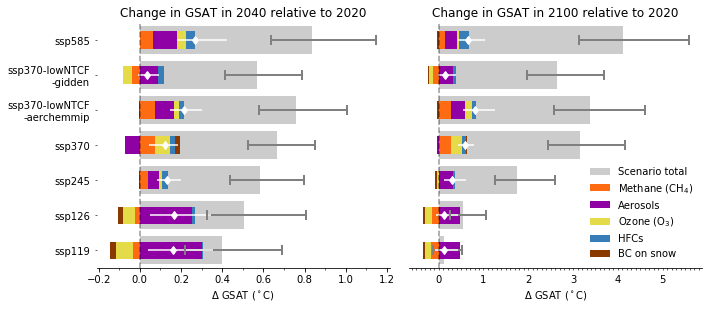

In [48]:
fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs,tabel_dT_anthrop_5th,
            tabel_dT_anthrop_95th, tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

In [49]:

scen_no_lowNTCF = [scn for scn in scenarios_fl if 'lowNTCF' not in scn]
print(scen_no_lowNTCF)

['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']


In [50]:
subset_scenarios = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))

In [51]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [52]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245     ssp370  \
                                                                       
2040 Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628  0.0761809   
     Aerosols              0.3018    0.251685   0.0490549 -0.0726136   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  0.0698454   
     HFCs              0.00559328   0.0173057   0.0287474  0.0267615   
     BC on snow        -0.0280065  -0.0233254 -0.00242724  0.0205846   
2100 Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217   0.276651   
     Aerosols            0.466045    0.473464    0.317819 -0.0403152   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325   0.236445   
     HFCs             -0.00401652 -0.00167825    0.057604  0.0971195   
     BC on snow        -0.0415275  -0.0394008   -0.035945  0.0136354   

                      ssp370-lowNTCF\n-aerchemmip      ssp585  
                                                               
2040 Methane (CH$_4$)                   0.0761809   0.0618279  
     Aerosols                           0.0890779    0.120968  
     Ozone (O$_3$)                      0.0244954   0.0400979  
     HFCs                               0.0267615   0.0426328  
     BC on snow                       -0.00202703  0.00162298  
2100 Methane (CH$_4$)                    0.276651    0.147478  
     Aerosols                             0.31218    0.261816  
     Ozone (O$_3$)                       0.157736   0.0506565  
     HFCs                               0.0971195    0.223788  
     BC on snow                        -0.0274264  -0.0296496

- Include BC in aerosol total. 
- aaarggh, sorry, a last request, maybe one version with also SSP370lowNTC with and without CH4 decrease (as it was in SOD) and one without and we will see later which one we choose depending on the discussion which will remain in the TS.
- net values. Send. 
- include total in black. 

[[0.17975565 0.18026931 0.14602566 0.1404323  0.17952808 0.19953194]
 [0.29396479 0.29945765 0.21329434 0.18714292 0.2502172  0.3108279 ]]
                  ssp119    ssp126    ssp245    ssp370  \
                                                         
Scenario total  0.397428  0.505497  0.584779  0.663786   

               ssp370-lowNTCF\n-aerchemmip    ssp585  
                                                      
Scenario total                     0.75756  0.836875  
Index(['Methane (CH$_4$)', 'Aerosols', 'Ozone (O$_3$)', 'HFCs', 'BC on snow'], dtype='object', name='')
[[0.24533043 0.29285193 0.4906444  0.7090324  0.80789742 0.97972116]
 [0.40850634 0.52257048 0.84296916 1.01014557 1.23371342 1.46800165]]
                  ssp119    ssp126   ssp245   ssp370  \
                                                       
Scenario total  0.116036  0.544207  1.75423  3.15208   

               ssp370-lowNTCF\n-aerchemmip   ssp585  
                                                     
S

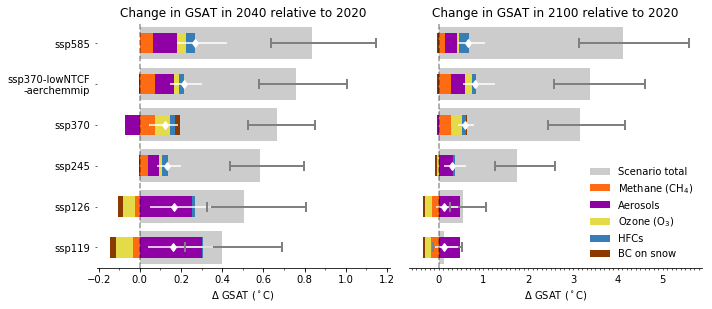

In [53]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)
fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

plt.show()

In [54]:
#tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
#tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]


subset_scenarios = list(pd.Series(scen_no_lowNTCF).replace(rn_dic_scen))

In [55]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [56]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245     ssp370  \
                                                                       
2040 Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628  0.0761809   
     Aerosols              0.3018    0.251685   0.0490549 -0.0726136   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  0.0698454   
     HFCs              0.00559328   0.0173057   0.0287474  0.0267615   
     BC on snow        -0.0280065  -0.0233254 -0.00242724  0.0205846   
2100 Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217   0.276651   
     Aerosols            0.466045    0.473464    0.317819 -0.0403152   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325   0.236445   
     HFCs             -0.00401652 -0.00167825    0.057604  0.0971195   
     BC on snow        -0.0415275  -0.0394008   -0.035945  0.0136354   

                           ssp585  
                                   
2040 Methane (CH$_4$)   0.0618279  
     Aerosols            0.120968  
     Ozone (O$_3$)      0.0400979  
     HFCs               0.0426328  
     BC on snow        0.00162298  
2100 Methane (CH$_4$)    0.147478  
     Aerosols            0.261816  
     Ozone (O$_3$)      0.0506565  
     HFCs                0.223788  
     BC on snow        -0.0296496

[[0.17975565 0.18026931 0.14602566 0.1404323  0.19953194]
 [0.29396479 0.29945765 0.21329434 0.18714292 0.3108279 ]]
                  ssp119    ssp126    ssp245    ssp370    ssp585
                                                                
Scenario total  0.397428  0.505497  0.584779  0.663786  0.836875
Index(['Methane (CH$_4$)', 'Aerosols', 'Ozone (O$_3$)', 'HFCs', 'BC on snow'], dtype='object', name='')
[[0.24533043 0.29285193 0.4906444  0.7090324  0.97972116]
 [0.40850634 0.52257048 0.84296916 1.01014557 1.46800165]]
                  ssp119    ssp126   ssp245   ssp370   ssp585
                                                             
Scenario total  0.116036  0.544207  1.75423  3.15208  4.11427
Index(['Methane (CH$_4$)', 'Aerosols', 'Ozone (O$_3$)', 'HFCs', 'BC on snow'], dtype='object', name='')


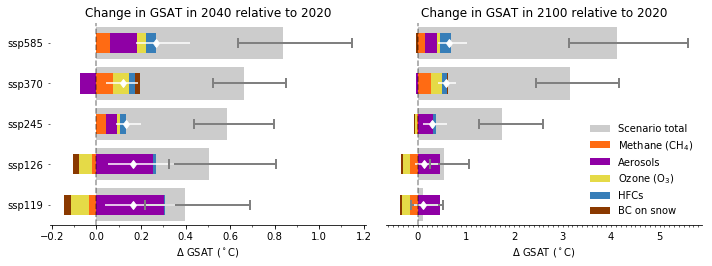

In [57]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.8], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [58]:
#tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
#tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]

scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]
subset_scenarios = list(pd.Series(scenario_370).replace(rn_dic_scen))

In [59]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

[[0.1404323  0.17952808 0.15487879]
 [0.18714292 0.2502172  0.2191848 ]]
                  ssp370 ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden
                                                                            
Scenario total  0.663786                     0.75756                0.566941
Index(['Methane (CH$_4$)', 'Aerosols', 'Ozone (O$_3$)', 'HFCs', 'BC on snow'], dtype='object', name='')
[[0.7090324  0.80789742 0.67292353]
 [1.01014557 1.23371342 1.04881693]]
                 ssp370 ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden
                                                                           
Scenario total  3.15208                     3.37383                 2.64906
Index(['Methane (CH$_4$)', 'Aerosols', 'Ozone (O$_3$)', 'HFCs', 'BC on snow'], dtype='object', name='')


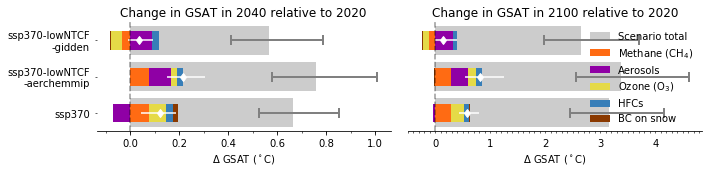

In [60]:
from matplotlib.ticker import (MultipleLocator)
fig, axs = plt.subplots(1, len(years), figsize=[10, 2.5], sharex=False, sharey=True)

plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_horiz_errTot_370only.png'

plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [61]:
variables_erf_comp

['ch4', 'aerosol-total', 'o3', 'HFCs', 'bc_on_snow']

In [62]:
variables_erf_comp_nbc = ['ch4', 'aerosol-total-with_bc', 'o3', 'HFCs']

In [63]:
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)


In [64]:
subset_scenarios = scen_no_lowNTCF
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

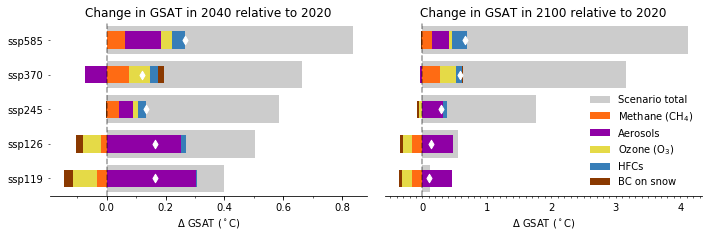

In [65]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.4], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    # ax.scatter(_t, _t.index, zorder=100, c='w', marker='d')
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')

    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

In [66]:
subset_scen_fl = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))
tabel_dT_slcfs_noBC = table_of_sts(ds_DT, scenarios_fl_oneNTCF, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
#tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
#tabel_dT_slcfs2 = tabel_dT_slcfs2[subset_scen_fl]
#tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scen_fl#]

In [67]:
subset_scenarios = subset_scen_fl
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs_noBC[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
#tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
#tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
#tabel_dT_slcfs2_5th = tabel_dT_slcfs_5th[subset_scenarios]
#tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
#tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

ssp119                         0.163439
ssp126                         0.164934
ssp245                         0.132115
ssp370                         0.120759
ssp370-lowNTCF\n-aerchemmip    0.214489
ssp585                         0.267149
dtype: float64
ssp119                         0.108953
ssp126                         0.129905
ssp245                         0.292503
ssp370                         0.583536
ssp370-lowNTCF\n-aerchemmip    0.816260
ssp585                         0.654088
dtype: float64


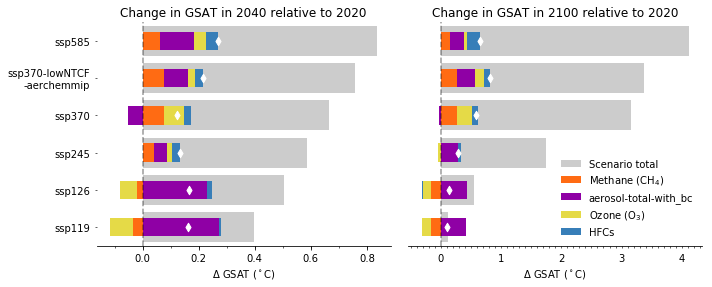

In [68]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.1], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [69]:
subset_scen_fl = list(pd.Series(scenarios_fl).replace(rn_dic_scen))
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[subset_scen_fl]
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scen_fl]

ssp119                         0.163439
ssp126                         0.164934
ssp245                         0.132115
ssp370                         0.120759
ssp370-lowNTCF\n-aerchemmip    0.214489
ssp370-lowNTCF\n-gidden        0.033381
ssp585                         0.267149
dtype: float64
ssp119                         0.108953
ssp126                         0.129905
ssp245                         0.292503
ssp370                         0.583536
ssp370-lowNTCF\n-aerchemmip    0.816260
ssp370-lowNTCF\n-gidden        0.147628
ssp585                         0.654088
dtype: float64


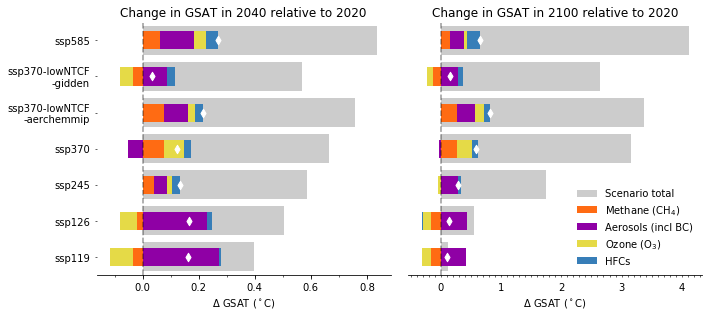

In [70]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.5], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_all_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

## Error bars from model uncertainty AND ECS uncertainty

See [Uncertainty_calculation.ipynb](Uncertainty_calculation.ipynb)

## Only ssp370:

In [71]:
scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]